In [1]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd


In [2]:
t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

array(['TAX1', 'TAX4', 'TAX7', ..., 'TAX10235', 'TAX10238', 'TAX10239'],
      dtype='<U8')

In [3]:
phylum_idx = 6
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][6:phylum_idx + 1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
# display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()

,AAA00108,AAA00405,AAA00507,AAA00607,AAA00806,AAA00910
Korarchaeum_cryptofilum,2.0,5.0,4.0,0.0,3.0,0.0
Prometheoarchaeum_syntrophicum,70.0,11.0,56.0,8.0,47.0,30.0
Mancarchaeum_acidiphilum,0.0,4.0,1.0,0.0,1.0,0.0
Micrarchaeum_sp.,0.0,2.0,3.0,0.0,1.0,0.0
Micrarchaeota_sp,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Gordonia_virus_Yvonnetastic,0.0,0.0,1.0,0.0,1.0,0.0
Siphoviridae_sp,8.0,2.0,23.0,13.0,7.0,8.0
Caudovirales_sp,0.0,0.0,0.0,0.0,0.0,20.0
Wuhan_heteroptera_virus_3,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
# pct = col1.div(col1.sum(axis=0), axis=0)
# col1["AAA00108_pct"] = col1["AAA00108"] / col1["AAA00108"].sum()
# pct = pct.where(pct >= 0.10).dropna()
# display(pct.where(pct >= 0.001).dropna())
# col1_largest = pct.nlargest(10, 'AAA00108')
# display(col1_largest)

,AAA00108,AAA00405,AAA00507,AAA00607,AAA00806,AAA00910
Korarchaeum_cryptofilum,6.204035e-08,1.920562e-07,1.471204e-07,0.000000e+00,1.117628e-07,0.000000e+00
Prometheoarchaeum_syntrophicum,2.171412e-06,4.225236e-07,2.059686e-06,2.838760e-07,1.750950e-06,1.138049e-06
Mancarchaeum_acidiphilum,0.000000e+00,1.536449e-07,3.678010e-08,0.000000e+00,3.725427e-08,0.000000e+00
Micrarchaeum_sp.,0.000000e+00,7.682247e-08,1.103403e-07,0.000000e+00,3.725427e-08,0.000000e+00
Micrarchaeota_sp,3.102018e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
Gordonia_virus_Yvonnetastic,0.000000e+00,0.000000e+00,3.678010e-08,0.000000e+00,3.725427e-08,0.000000e+00
Siphoviridae_sp,2.481614e-07,7.682247e-08,8.459424e-07,4.612985e-07,2.607799e-07,3.034798e-07
Caudovirales_sp,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.586994e-07
Wuhan_heteroptera_virus_3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.793497e-08


,AAA00108,AAA00405,AAA00507,AAA00607,AAA00806,AAA00910
Anaerobutyricum_hallii,0.034341,0.023234,0.003494,0.041654,0.039710,0.018905
Anaerostipes_hadrus,0.058736,0.053754,0.008690,0.023401,0.001171,0.059185
Blautia_obeum,0.009922,0.008978,0.003957,0.006499,0.007411,0.008836
Blautia_SC05B48,0.008623,0.048006,0.003149,0.048230,0.008612,0.023817
Blautia_sp,0.003147,0.002680,0.001188,0.001609,0.002439,0.002225
Coprococcus_catus,0.006042,0.003356,0.001063,0.002920,0.002880,0.005750
Coprococcus_comes,0.014118,0.027503,0.002224,0.030061,0.004335,0.008667
Faecalicatena_Marseille-Q4148,0.005151,0.002925,0.001920,0.001364,0.001448,0.001305
Ruminococcus_gnavus,0.049764,0.011527,0.008874,0.004879,0.005362,0.001804
Ruminococcus_torques,0.004510,0.028215,0.002057,0.002387,0.003099,0.010867


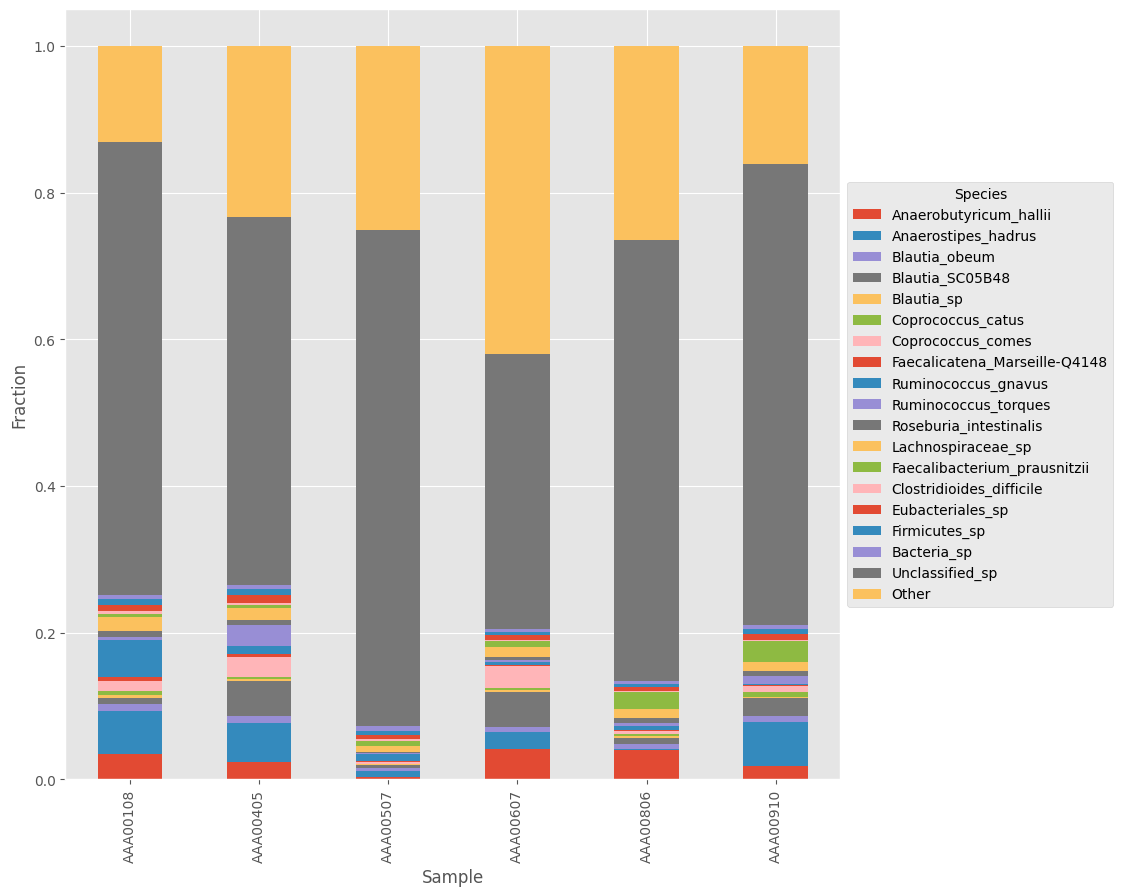

In [37]:
pct = col1.apply(lambda x: x / x.sum(), axis=0)
display(pct)
pct = pct.where(pct >= 0.001).dropna()

# Add other category to account for dropped samples.
pct.loc['Other']= 1.0 - pct.sum(numeric_only=True, axis=0)
display(pct)

import matplotlib
matplotlib.style.use('ggplot') 
pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Species")

In [ ]:
# Sanity check to make sure my operations are correct.

test_df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])

pct_test = test_df.apply(lambda x: x / x.sum(), axis=0)
display(pct_test)

pct_test = pct_test.where(pct_test >= 0.50).dropna()
display(pct_test)

pct_test.loc['Column_Total']= 1.0 - pct_test.sum(numeric_only=True, axis=0)
display(pct_test)